In [28]:
import torch
# import pyro
import torch.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
torch.cuda.device_count()

1

In [15]:
# variational inference with coordinate ascent
m = dist.Normal(loc=2,scale=1)
# Any distribution with .has_rsample == True could work based on the application
print(m.rsample(sample_shape=[1]))

# loss = -reward
# loss.backward()

tensor([1.3684])


In [237]:
m1 = dist.multivariate_normal.MultivariateNormal(loc=torch.Tensor([0,0]), covariance_matrix=torch.Tensor([[2,-1],[-1,2]]))
m2 = dist.multivariate_normal.MultivariateNormal(loc=torch.Tensor([2,3]), covariance_matrix=torch.Tensor([[2,1.2],[1.2,2]]))
class mixture(torch.nn.Module):
    def __init__(self, components, pi):
        self.components = components
        self.pi = pi
        self.num = len(components)
    def pdf(self, x):
        return torch.sum(torch.stack([self.pi[i]*np.exp(self.components[i].log_prob(x)) for i in range(self.num)], dim=0), dim=0)
    
mix = mixture([m1,m2],[0.3,0.7])  

In [238]:
m1.rsample(sample_shape=[10])
mix.pdf(torch.Tensor([[1,2],[2,3]]))

tensor([0.0536, 0.0697])

In [239]:
def plot_contours(ax, func, xlimits=[-10,10], ylimits=[-10,10],numticks=101):
    x = np.linspace(*xlimits, num=numticks)
    y = np.linspace(*ylimits, num=numticks)
    X, Y = np.meshgrid(x, y)
    coor = torch.Tensor(np.concatenate([np.atleast_2d(X.ravel()), np.atleast_2d(Y.ravel())]).T)
    zs = func(coor).data.numpy()
    Z = zs.reshape(X.shape)
    plt.contour(X, Y, Z)
    ax.set_yticks([])
    ax.set_xticks([])

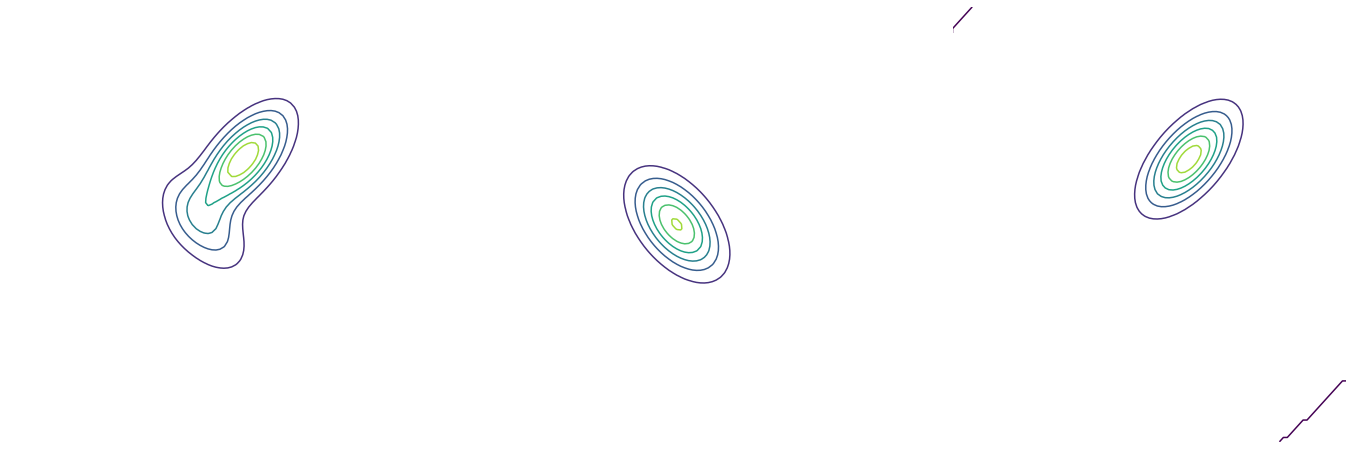

In [241]:
fig = plt.figure(figsize=[24,8],facecolor='white')
ax = fig.add_subplot(131,frameon=False)
plot_contours(ax, mix.pdf)
plot_contours(fig.add_subplot(132,frameon=False),lambda x: np.exp(m1.log_prob(x)))
plot_contours(fig.add_subplot(133, frameon=False),lambda x: np.exp(m2.log_prob(x)))
plt.ion()
plt.show(block=False)

In [ ]:
# inference of a Gaussian Mixture Model with EM
# data
data = mix.sample()